## 2.Scikit-learn主要用法

### 2.1.基本建模流程

基本建模的符号标记见下表：


| 符号    | 代表含义 | 符号    | 代表含义   |
|---------|----------|---------|------------|
| X_train | 训练数据 | y_train | 训练集标签 |
| X_test  | 测试数据 | y_test  | 测试集标签 |
| X       | 完整数据 | y       | 数据标签   |
|         |          | y_pred  | 预测标签   |

### 2.1.1.导入工具包

导入工具包的方法如下(这里使用伪代码)：

`from sklearn import 包名称`
`from sklearn.库名称 import 包名称`
例如：

In [1]:
from sklearn import datasets, preprocessing  
#导入数据集，数据预处理库  
from sklearn.model_selection import train_test_split    
#从模型选择库导入数据切分包  
from sklearn.linear_model import LinearRegression    
#从线性模型库导入线性回归包  
from sklearn.metrics import r2_score  
#从评价指标库导入R2评价指标
#导入类库和加载数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [42]:
#导入数据集
train_columns = ["date","price","bedroom_num","bathroom_num","house_area","park_space","floor_num",
                "house_score","covered_area","basement_area","yearbuilt","yearremodadd","lat","long"]
test_columns = ["date","bedroom_num","bathroom_num","house_area","park_space","floor_num",
                "house_score","covered_area","basement_area","yearbuilt","yearremodadd","lat","long"]
train_df = pd.read_csv(r'C:\Users\FOMO\Desktop\机械学习\实验1\线性回归数据集\kc_train.csv', names=train_columns)
test_df = pd.read_csv(r'C:\Users\FOMO\Desktop\机械学习\实验1\线性回归数据集\kc_test.csv', names=test_columns)

In [43]:
#查看数据集
train_df.head()

,date,price,bedroom_num,bathroom_num,house_area,park_space,floor_num,house_score,covered_area,basement_area,yearbuilt,yearremodadd,lat,long
0,20150302,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113
1,20150211,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036
2,20150107,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002
3,20141103,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138
4,20140603,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172


In [44]:
# 观察数据集概况
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10000 non-null  int64  
 1   price          10000 non-null  int64  
 2   bedroom_num    10000 non-null  int64  
 3   bathroom_num   10000 non-null  float64
 4   house_area     10000 non-null  int64  
 5   park_space     10000 non-null  int64  
 6   floor_num      10000 non-null  float64
 7   house_score    10000 non-null  int64  
 8   covered_area   10000 non-null  int64  
 9   basement_area  10000 non-null  int64  
 10  yearbuilt      10000 non-null  int64  
 11  yearremodadd   10000 non-null  int64  
 12  lat            10000 non-null  float64
 13  long           10000 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [45]:
test_df.head()

,date,bedroom_num,bathroom_num,house_area,park_space,floor_num,house_score,covered_area,basement_area,yearbuilt,yearremodadd,lat,long
0,20140502,2,1.00,880,6380,1.0,7,880,0,1938,1994,47.6924,-122.322
1,20150213,4,2.50,2880,8833,2.0,7,2880,0,2006,0,47.5388,-121.890
2,20141215,4,2.50,1980,5020,2.0,7,1980,0,2007,0,47.5147,-122.190
3,20140617,3,2.50,2830,6536,2.0,9,2830,0,1989,0,47.7462,-122.172
4,20150410,3,1.75,1900,13600,1.0,8,1900,0,1956,0,47.6163,-122.219


In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3000 non-null   int64  
 1   bedroom_num    3000 non-null   int64  
 2   bathroom_num   3000 non-null   float64
 3   house_area     3000 non-null   int64  
 4   park_space     3000 non-null   int64  
 5   floor_num      3000 non-null   float64
 6   house_score    3000 non-null   int64  
 7   covered_area   3000 non-null   int64  
 8   basement_area  3000 non-null   int64  
 9   yearbuilt      3000 non-null   int64  
 10  yearremodadd   3000 non-null   int64  
 11  lat            3000 non-null   float64
 12  long           3000 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 304.8 KB


In [3]:
#from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                    y,
#                                                    random_state=12,
#                                                    stratify=y,
#                                                    test_size=0.3)
#将完整数据集的70%作为训练集，30%作为测试集，
#并使得测试集和训练集中各类别数据的比例与原始数据集比例一致(stratify分层策略)，另外可通过设置shuffle=True 提前打乱数据。

In [47]:
# 处理日期数据
train_df['sell_year'] = train_df['date'] // 10000
train_df['sell_month'] = train_df['date'] % 10000 // 100
train_df['sell_day'] = train_df['date'] % 100
train_df['house_old'] = train_df['sell_year'] - train_df['yearbuilt']
train_df['fix_old'] = train_df['sell_year'] - train_df['yearremodadd']
train_df['fix_old'] = train_df['fix_old'].replace({-1: 0})  # 将未进行过修复的年数设为 0

# 删除原始的 date 列
train_df.drop('date', axis=1, inplace=True)

# 显示更新后的 DataFrame
train_df.head()


,price,bedroom_num,bathroom_num,house_area,park_space,floor_num,house_score,covered_area,basement_area,yearbuilt,yearremodadd,lat,long,sell_year,sell_month,sell_day,house_old,fix_old
0,545000,3,2.25,1670,6240,1.0,8,1240,430,1974,0,47.6413,-122.113,2015,3,2,41,2015
1,785000,4,2.50,3300,10514,2.0,10,3300,0,1984,0,47.6323,-122.036,2015,2,11,31,2015
2,765000,3,3.25,3190,5283,2.0,9,3190,0,2007,0,47.5534,-122.002,2015,1,7,8,2015
3,720000,5,2.50,2900,9525,2.0,9,2900,0,1989,0,47.5442,-122.138,2014,11,3,25,2014
4,449500,5,2.75,2040,7488,1.0,7,1200,840,1969,0,47.7289,-122.172,2014,6,3,45,2014


In [48]:
# 处理日期数据
test_df['sell_year'] = test_df['date'] // 10000
test_df['sell_month'] = test_df['date'] % 10000 // 100
test_df['sell_day'] = test_df['date'] % 100
test_df['house_old'] = test_df['sell_year'] - test_df['yearbuilt']
test_df['fix_old'] = test_df['sell_year'] - test_df['yearremodadd']
test_df['fix_old'] = test_df['fix_old'].replace({-1: 0})  # 将未进行过修复的年数设为 0

# 删除原始的 date 列
test_df.drop('date', axis=1, inplace=True)

# 显示更新后的 DataFrame
test_df.head()

,bedroom_num,bathroom_num,house_area,park_space,floor_num,house_score,covered_area,basement_area,yearbuilt,yearremodadd,lat,long,sell_year,sell_month,sell_day,house_old,fix_old
0,2,1.00,880,6380,1.0,7,880,0,1938,1994,47.6924,-122.322,2014,5,2,76,20
1,4,2.50,2880,8833,2.0,7,2880,0,2006,0,47.5388,-121.890,2015,2,13,9,2015
2,4,2.50,1980,5020,2.0,7,1980,0,2007,0,47.5147,-122.190,2014,12,15,7,2014
3,3,2.50,2830,6536,2.0,9,2830,0,1989,0,47.7462,-122.172,2014,6,17,25,2014
4,3,1.75,1900,13600,1.0,8,1900,0,1956,0,47.6163,-122.219,2015,4,10,59,2015


In [49]:
#观察数据
print(train_df['price'].describe())

count    1.000000e+04
mean     5.428749e+05
std      3.729258e+05
min      7.500000e+04
25%      3.225000e+05
50%      4.507000e+05
75%      6.450000e+05
max      6.885000e+06
Name: price, dtype: float64


C:\Users\FOMO\AppData\Local\Temp\ipykernel_7944\637160992.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['price'])


<Axes: xlabel='price', ylabel='Density'>

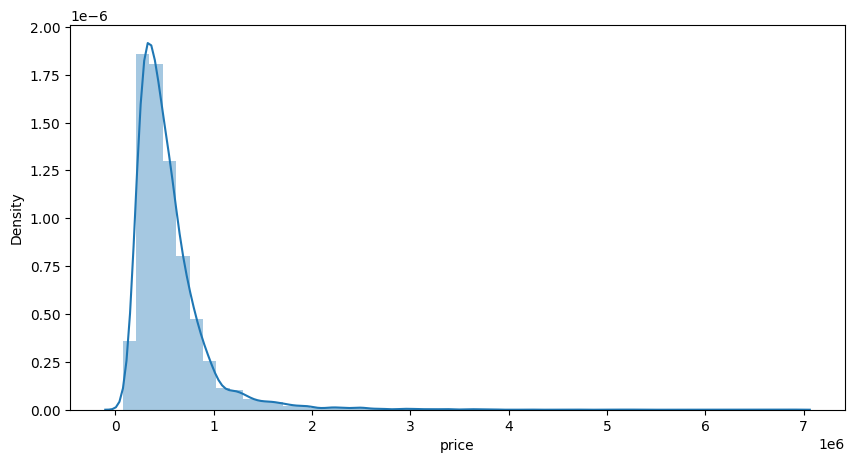

In [50]:
#观察price的数据分布
plt.figure(figsize = (10,5))
# plt.xlabel('price')
sns.distplot(train_df['price'])

In [52]:
#使⽤Scikit-learn进⾏数据标准化
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, Normalizer, Binarizer, PolynomialFeatures

#特征缩放
data = train_df.astype('float')
x = data.drop('price',axis=1)
y = data['price']

scaler = MinMaxScaler()
newX = scaler.fit_transform(x)
new_test_df = scaler.transform(test_df)

newX = pd.DataFrame(newX, columns=x.columns)
new_test_df = pd.DataFrame(new_test_df, columns=test_df.columns)
newX.head()

,bedroom_num,bathroom_num,house_area,park_space,floor_num,house_score,covered_area,basement_area,yearbuilt,yearremodadd,lat,long,sell_year,sell_month,sell_day,house_old,fix_old
0,0.3,0.290323,0.134737,0.003434,0.0,0.5,0.100354,0.089212,0.643478,0.0,0.779557,0.337209,1.0,0.181818,0.033333,0.362069,1.000000
1,0.4,0.322581,0.306316,0.006023,0.4,0.7,0.343566,0.000000,0.730435,0.0,0.765001,0.401163,1.0,0.090909,0.333333,0.275862,1.000000
2,0.3,0.419355,0.294737,0.002854,0.4,0.6,0.330579,0.000000,0.930435,0.0,0.637393,0.429402,1.0,0.000000,0.200000,0.077586,1.000000
3,0.5,0.322581,0.264211,0.005423,0.4,0.6,0.296340,0.000000,0.773913,0.0,0.622513,0.316445,0.0,0.909091,0.066667,0.224138,0.999504
4,0.5,0.354839,0.173684,0.004190,0.0,0.4,0.095632,0.174274,0.600000,0.0,0.921236,0.288206,0.0,0.454545,0.066667,0.396552,0.999504


In [53]:
# 准备数据
X_train = newX
y_train = y

In [64]:
#从线性模型库导入线性回归模型
from sklearn.linear_model import LinearRegression

# 构建模型实例
lr = LinearRegression()
# 训练模型
lr.fit(X_train, y_train)

# 作出预测
y_pred_1 = lr.predict(new_test_df)


In [65]:
print(y_pred_1)

[463360. 470784. 291072. ... 269312. 850432. 883072.]


In [66]:
#从树模型库导入决策树
from sklearn.tree import DecisionTreeClassifier
#定义模型
clf = DecisionTreeClassifier(max_depth=5)
#训练模型
clf.fit(X_train, y_train)
#使用决策树分类算法解决二分类问题，得到的是类别
y_pred_2 = clf.predict(new_test_df)
#y_prob 为每个样本预测为“0”和“1”类的概率
y_prob = clf.predict_proba(new_test_df)

In [67]:
print(y_pred_2)

[500000. 750000. 300000. ... 500000. 375000. 525000.]


In [68]:
#从聚类模型库导入kmeans  
from sklearn.cluster import KMeans  
#构建聚类实例  
kmeans = KMeans(n_clusters=3, random_state=0)  
#拟合  
kmeans.fit(X_train)  
#预测  
kmeans.predict(new_test_df) 

c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 1, ..., 0, 0, 1])

In [69]:
#导入PCA库
from sklearn.decomposition import PCA
#设置主成分数量为3，n_components代表主成分数量
pca = PCA(n_components=3)
#训练模型
pca.fit(X_train)
#投影后各个特征维度的方差比例(这里是三个主成分)
print(pca.explained_variance_ratio_)
#投影后的特征维度的方差
print(pca.explained_variance_)

[0.36059079 0.21498857 0.10963798]
[0.27534194 0.16416218 0.08371799]


In [19]:
#从评价指标库导入准确率
from sklearn.metrics import accuracy_score
#计算样本的准确率
accuracy_score(y_test, y_pred_2)
#对于测试集而言，大部分函数都必须包含真实值y_test和预测值y_pred

NameError: name 'y_test' is not defined

In [72]:
#从模型选择库导入交叉验证分数  
from sklearn.model_selection import cross_val_score    
clf = DecisionTreeClassifier(max_depth=5)  
#使用5折交叉验证对决策树模型进行评估，使用的评分函数为F1值  
scores = cross_val_score(clf, X_train, y_train,cv=3, scoring='f1_weighted')

c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [73]:
print("交叉验证的 F1 分数:", scores)


交叉验证的 F1 分数: [0.00239874 0.00218124 0.00257866]


In [101]:
#从模型选择库导入网格搜索
from sklearn.model_selection import GridSearchCV
from sklearn import svm

svc = svm.SVC()
#把超参数集合作为字典
params = {'kernel': ['linear', 'rbf'], 'C': [1, 10]}
#进行网格搜索，使用了支持向量机分类器，并进行五折交叉验证
grid_search = GridSearchCV(svc, params, cv=3, n_jobs=-1)
#模型训练
grid_search.fit(X_train, y_train)
#获取模型最优超参数组合
grid_search.best_params_

c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


{'C': 10, 'kernel': 'linear'}

In [24]:
#从模型选择库导入随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import svm

svc = svm.SVC()
#把超参数组合作为字典
param_dist = {'kernel': ['linear', 'rbf'], 'C': randint(1, 20)}
#进行随机搜索
random_search = RandomizedSearchCV(svc, param_dist, n_iter=3, n_jobs=-1)
#模型训练
random_search.fit(X_train, y_train)
#获取最优超参数组合
random_search.best_params_

c:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'C': 13, 'kernel': 'linear'}